# Notebook 3 - Model Comparison

- This notebook aims to determine the evidence ratios between the **Anistropic** (Radial and Tangential Errors) and the **Isotropic**  (single 2D error) models

In [ ]:
# Import necessary libraries
import jax.numpy as jnp
import pandas as pd
from calender_analysis import Calender_Analysis 
# ------------------ Data ------------------
original_data_path = "data/Hole_Measurements.csv"  
# ------------------ Rerun Computationally Expensive Analysis ------------------
rerun_comp_expensive_analysis = True

# ------------------ Ansotropic Model ------------------
Antikythera_Anisotropic_Basic_Filter = Calender_Analysis(data = original_data_path, model_type = "anisotropic", filtering = 'Basic', priors = None, num_cores = 4)


# ------------------ Isotropic Model ------------------
Antikythera_Isotropic_Basic_Filter = Calender_Analysis(data = original_data_path, model_type = "isotropic", filtering = 'Basic', priors = None, num_cores = 4)

2025-03-11 16:24:27,118 - INFO - JAX Detected Devices: 8
2025-03-11 16:24:27,119 - INFO - JAX configured to use 4 devices for parallel chains.
2025-03-11 16:24:27,125 - INFO -  
        DATA SUMMARY
Total Sections   : 6
Total Holes      : 79
---------------------------------
Section ID   |   Hole Range 
--------------------------------- 
      1      |   2 - 23
      2      |   24 - 32
      3      |   33 - 69
      4      |   71 - 73
      5      |   74 - 75
      6      |   76 - 81 
--------------------------------- 


INFO:2025-03-11 16:24:27,137:jax._src.xla_bridge:924: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'


2025-03-11 16:24:27,137 - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'


INFO:2025-03-11 16:24:27,139:jax._src.xla_bridge:924: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)


2025-03-11 16:24:27,139 - INFO - Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)
2025-03-11 16:24:27,208 - INFO - JAX Detected Devices: 8
2025-03-11 16:24:27,209 - INFO - JAX configured to use 4 devices for parallel chains.
2025-03-11 16:24:27,214 - INFO -  
        DATA SUMMARY
Total Sections   : 6
Total Holes      : 79
---------------------------------
Sec

## Method 1 - Savage Dickey Ratio

The **isotropic** and **anisotropic** models can be considered **nested models** because the **isotropic model** is a **special case** of the **anisotropic model** where the two principal components of the covariance matrix are equal:

### **Anisotropic Model:**  
$$

\Sigma =
\begin{bmatrix}
\sigma_r & 0 \\
0 & \sigma_t
\end{bmatrix}

$$
where $\sigma_r$ and $\sigma_t$ are the radial and tangential dispersions, respectively.

### **Isotropic Model (Special Case):**  
$$
\Sigma =
\begin{bmatrix}
\sigma & 0 \\
0 & \sigma
\end{bmatrix}
$$
where $\sigma_r = \sigma_t = \sigma$, meaning the dispersion is the same in all directions.

---

This test estimates the ratio of **posterior** to **prior** probability densities at the point where the isotropic constraint holds:

$$
R_{SD} = \frac{P_{\text{posterior}}(\sigma_t = \sigma_r)}{P_{\text{prior}}(\sigma_t = \sigma_r)}
$$

where:
- $ \sigma_t - \sigma_r $ represents the **deviation from isotropy**.
- $ P_{\text{posterior}}( \sigma_t - \sigma_r \ \approx 0) $ is the estimated probability density from the **posterior** distribution.
- $ P_{\text{prior}}( \sigma_t - \sigma_r \ \approx 0) $ is the estimated probability density from the **prior** distribution.

---

## **Method Implementation**  

### **1. Posterior Sampling**  
- Runs an **optimised Hamiltonian Monte Carlo (HMC) MCMC** chain.  
- Extracts posterior samples for **$\sigma_t$** and **$\sigma_r$**.  
- Computes the transformed coordinates:  
  $$
  X = \sigma_t - \sigma_r, \quad Y = \sigma_t + \sigma_r
  $$

### **2. Prior Sampling**  
- Generates prior samples for **$\sigma_t$** and **$\sigma_r$**.  
- Computes the same transformed coordinates as for the posterior.

### **3. Kernel Density Estimation (KDE) & Probability Estimation**  
- Uses **1D KDE** to estimate the probability density at **$ X = 0 $** for both prior and posterior distributions.  
- Computes the **Savage-Dickey ratio** from these estimates.  


2025-03-11 15:59:56,035 - INFO - Running HMC to generate posterior samples, aiming for 1000...
2025-03-11 15:59:56,044 - INFO - Running MCMC with Optimised Hyperparameters: step_size=1, accept_prob=0.85, dense_mass=False
Due to Autocorrelation Length: 2, the number of effective samples is reduced.
Total samples required to achieve 1000 effective samples: 2000
This is run on 4 parrallel chains each running 500 samples.


  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

2025-03-11 16:01:42,898 - INFO - Total MCMC Run Time: 106.85 seconds 
 Non Burn-In Run Time: 21.37 seconds
2025-03-11 16:01:45,400 - INFO -  Over 4 chains, 2000 were run, 
Achieved Gelman-Rubin Statistic: 1.0157, 
Achieved Effective Samples: 1266, 
True Auto-correlation Length: 2
2025-03-11 16:01:45,402 - INFO - Total samples remaining after thinning: 1000
2025-03-11 16:01:45,402 - INFO - Generating 10000 prior samples ...
2025-03-11 16:01:46,247 - INFO - Posterior Conditional Probability, Prior(sigma_r = sigma_t), generated to be: 0.00000
2025-03-11 16:01:46,248 - INFO - Prior Conditional Probability, Posterior(sigma_r = sigma_t), generated to be: 0.18411
2025-03-11 16:01:46,249 - INFO - Savage-Dickey Ratio: 0.00000


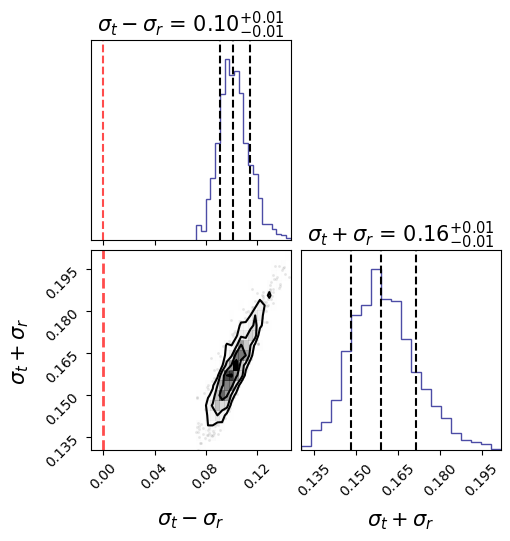

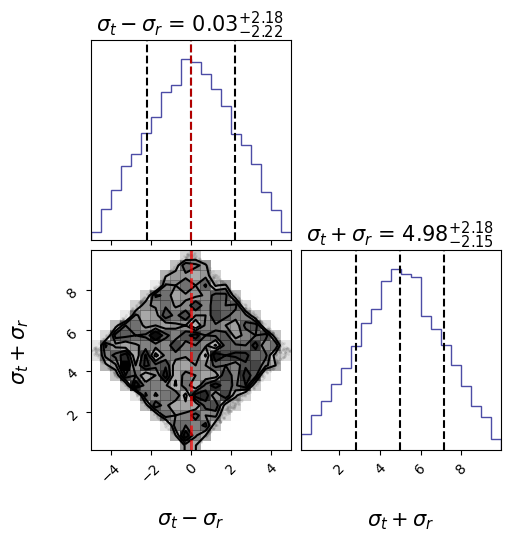

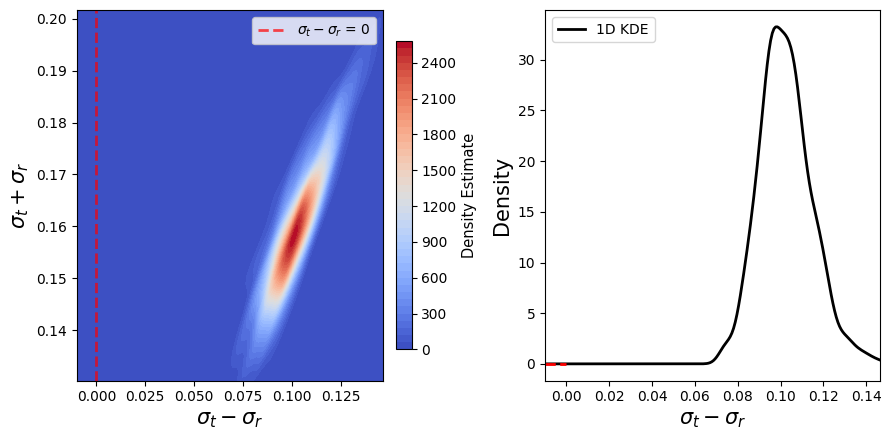

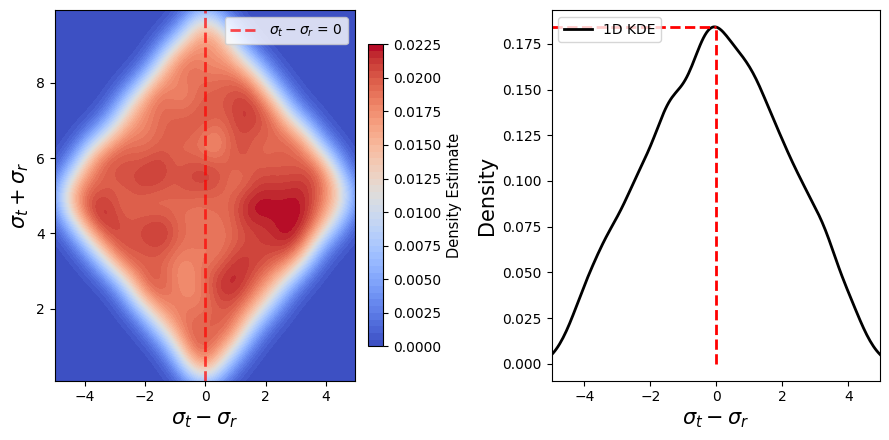

In [7]:
# Drawing best parameters stored from Notebook 1
nuts_params = pd.read_csv('stored_results/Anistropic_Basic_HMC_Opt_Results.csv')

# ------------------ Anisotropic Model ------------------
SD_results = Antikythera_Anisotropic_Basic_Filter.savage_dickey_comparison(nuts_params, burnin_period=2000, n_samples_posterior=10000, n_samples_prior=10000, random_seed=0, show_plots=True, random_key=0)


## Nested Sampling

### **Overview**
Nested sampling is now implemented to estimate the evidence of each model by iteratively **replacing the lowest-likelihood sample** with a new one.

---

### **Key Implementation Details**

#### **1. Prior Transformation (`ns_prior_transform`)**
- Maps **unit hypercube samples** to the actual **prior distributions**.
- Supports multiple distributions (**Uniform, Normal, Gamma, Beta, Truncated Normal, Exponential**).
- Efficiently handles **scalar and section-dependent parameters** (`x0`, `y0`, `alpha`).

#### **2. Log-Likelihood Computation (`ns_log_likelihood`)**
- Evaluates the **log-likelihood** for given transformed parameters.
- Supports both **isotropic** and **anisotropic** models.
- Ensures **numerical stability** by working in log-space.

---

### **3. Nested Sampling Loop (`run_nested_sampling`)**
1. **Initialize Live Points**  
   - Draws **num_live** samples from the prior.
   - Computes their **log-likelihoods**.

2. **Iterative Update**  
   - Removes the **lowest-likelihood sample**.
   - Computes **log-evidence increment** using:
     $$
     \log Z_{\text{new}} = \log \left( e^{\log Z} + e^{\log L_{\text{dead}} + \log X_i} \right)
     $$
   - Replaces the worst live point with a **new constrained prior sample**.

3. **Convergence Check**  
   - Stops when **log-evidence stabilizes**. or when max samples reached


## **For Anisotropic Model**

In [ ]:
if rerun_comp_expensive_analysis:
    NS_Anistropic_results = Antikythera_Anisotropic_Basic_Filter.run_nested_sampling(num_live=500, max_iter=4500, tol=0.2, seed=0, save_path = 'stored_results/Anisotropic_Basic_NS_results.pkl')

Running Nested Sampling:   0%|          | 0/3000 [00:00<?, ?iter/s]

/Users/jacobtutt/Desktop/MPhil_DIS/S2/Coursework_S2/calender_analysis/analysis.py:2620: RuntimeWarning: divide by zero encountered in log
  logZ_err = np.logaddexp(logZ_err, 2 * logL_dead + 2 * np.log(weight))


2025-03-11 16:11:41,099 - INFO - Nested Sampling results saved to stored_results/Anisotropic_Basic_NS_results.pkl


In [7]:
# Extract NS Sampling results from file
NS_Anistropic_results = pd.read_pickle('stored_results/Anisotropic_Basic_NS_results.pkl')
print(f'Log Evidence was found to be: {NS_Anistropic_results["logZ"]}')

Log Evidence was found to be: -1810.6782515171979


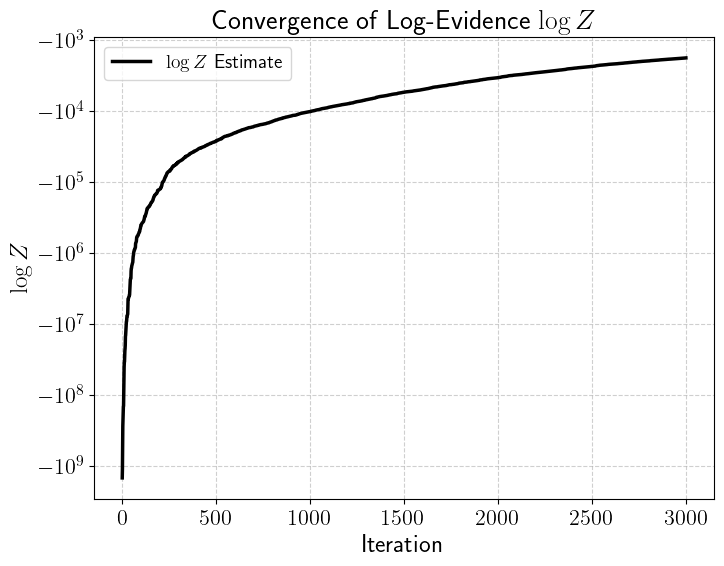

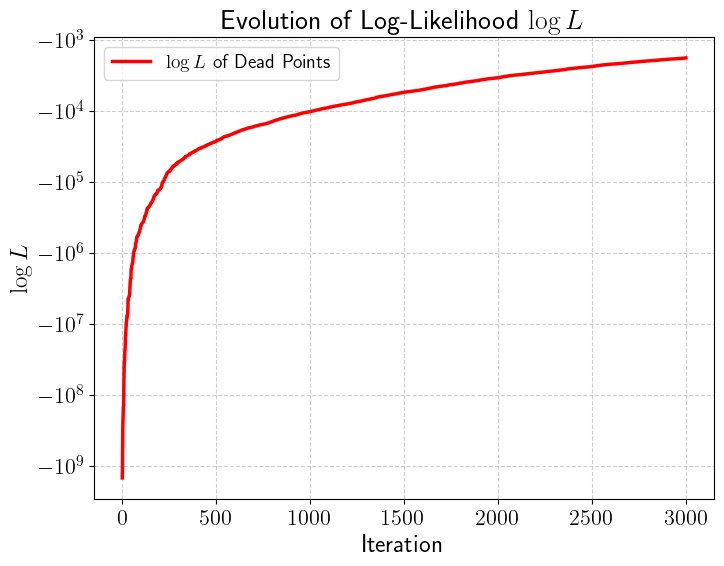

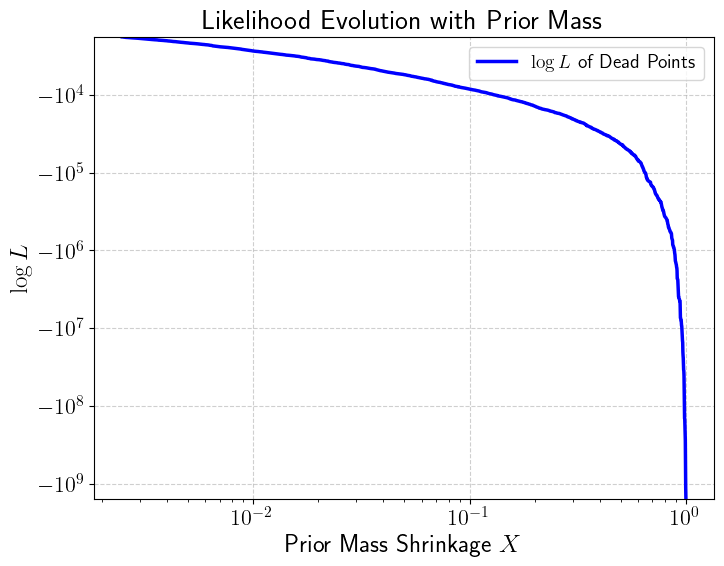

In [8]:
Antikythera_Anisotropic_Basic_Filter.plot_nested_sampling(NS_Anistropic_results)

## **For Isotropic Model**

In [ ]:
if rerun_comp_expensive_analysis:
    NS_Isotropic_results = Antikythera_Isotropic_Basic_Filter.run_nested_sampling(num_live=500, max_iter=4500, tol=0.2, seed=0, save_path = 'stored_results/Isotropic_Basic_NS_results.pkl')

In [ ]:
# Extract NS Sampling results from file
NS_Istropic_results = pd.read_pickle('stored_results/Isotropic_Basic_NS_results.pkl')
print(f'Log Evidence was found to be: {NS_Isotropic_results["logZ"]}')


In [ ]:
Antikythera_Isotropic_Basic_Filter.plot_nested_sampling(NS_Istropic_results)

## **Comparison of Both**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract data
iterations_aniso = np.arange(len(NS_Anistropic_results["logZs"]))
logZs_aniso = np.array(NS_Anistropic_results["logZs"])
logZ_errs_ansio = np.array(NS_Anistropic_results["logZ_errs"])

iterations_iso = np.arange(len(NS_Istropic_results["logZs"]))
logZs_iso = np.array(NS_Istropic_results["logZs"])
logZ_errs_iso = np.array(NS_Istropic_results["logZ_errs"])

# --- 1. Log-Evidence (logZ) Convergence Plot with Shaded Uncertainty ---
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(iterations_iso, logZs_iso, linestyle="-", color="black", label=r"$\log Z$ Isotropic")
ax.plot(iterations_aniso, logZs_aniso, linestyle="-", color="red", label=r"$\log Z$ Anisotropic")
# ax.fill_between(iterations, logZs - logZ_errs, logZs + logZ_errs, color="gray", alpha=0.3, label=r"$\pm 1\sigma$ Uncertainty")
ax.set_xlabel(r"Iteration")
ax.set_ylabel(r"$\log Z$")
ax.set_yscale('symlog')
ax.set_title(r"Convergence of Log-Evidence $\log Z$")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)
plt.show()

        